<a href="https://colab.research.google.com/github/oganiler/google_colab/blob/main/TF2_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

In [15]:
#Normalization of the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
N, D = X_train.shape

#model = tf.keras.models.Sequential([tf.keras.layers.Input(shape = (D,)),
#                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (D,)))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.3864 - loss: 0.8959 - val_accuracy: 0.4734 - val_loss: 0.8446
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4516 - loss: 0.8371 - val_accuracy: 0.5319 - val_loss: 0.7621
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5288 - loss: 0.7684 - val_accuracy: 0.6117 - val_loss: 0.6914
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6176 - loss: 0.7221 - val_accuracy: 0.6649 - val_loss: 0.6323
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6728 - loss: 0.6935 - val_accuracy: 0.7128 - val_loss: 0.5827
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7194 - loss: 0.6104 - val_accuracy: 0.7394 - val_loss: 0.5383
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7615 - loss: 0.6195 - val_accuracy: 0.7500 - val_loss: 0.5009
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8007 - loss: 0.5278 - val_accuracy: 0.7819 - 

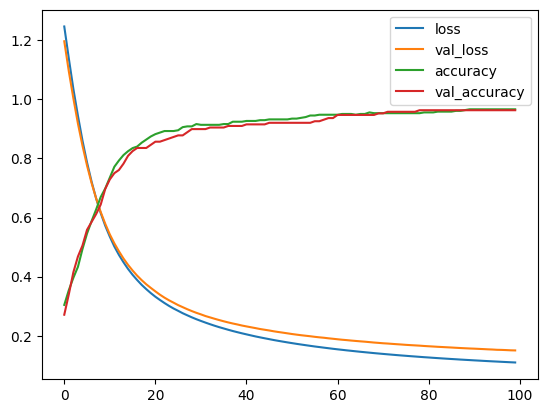

In [4]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [22]:
P = model.predict(X_test)
# print(P) # these are the outputs of signoig, interpreted as probilities p(y=1 | x)

#Round to get the actual predictions
#Note this has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
# print(P)

#Calculate the accuracy, compare it to evaulate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaulate output:", model.evaluate(X_test, y_test))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Manually calculated accuracy: 0.9574468085106383
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9674 - loss: 0.1145 
Evaulate output: [0.1127566248178482, 0.957446813583374]


In [23]:
#Let's save the model to a file
#model.save('tf_model_linear_classifier.h5') #legacy
model.save('my_linear_classifier_model.keras')
#keras.saving.save_model(model, 'my_linear_classifier_model.keras')

In [24]:
!ls -lh

total 40K
-rw-r--r-- 1 root root  16K Feb  6 23:06 my_linear_classifier_model.keras
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data
-rw-r--r-- 1 root root  18K Feb  6 22:51 tf_model_linear_classifier.h5


In [25]:
#Let's load the model and confirm that it still works
model_loaded = tf.keras.models.load_model('my_linear_classifier_model.keras')
print(model_loaded.layers)
model_loaded.evaluate(X_test, y_test)


[<Dense name=dense_5, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9674 - loss: 0.1145  


[0.1127566248178482, 0.957446813583374]

In [27]:
import keras  # or: import tensorflow as tf; keras = tf.keras (depends on your setup)

model = keras.models.load_model("my_linear_classifier_model.keras")
print(model_loaded.layers)
model_loaded.evaluate(X_test, y_test)

model.export("my_saved_model")  # creates a folder
!zip -r my_saved_model.zip my_saved_model

[<Dense name=dense_5, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9674 - loss: 0.1145 
Saved artifact at 'my_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140331141381392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140331141378512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  adding: my_saved_model/ (stored 0%)
  adding: my_saved_model/fingerprint.pb (stored 0%)
  adding: my_saved_model/saved_model.pb (deflated 79%)
  adding: my_saved_model/variables/ (stored 0%)
  adding: my_saved_model/variables/variables.data-00000-of-00001 (deflated 51%)
  adding: my_saved_model/variables/variables.index (deflated 47%)
  adding: my_saved_model/assets/ (stored 0%)
